# Statistical Analysis of Healthcare Insurance Costs

Healthcare insurance is a type of insurance that covers the cost of medical care. It provides financial protection for individuals and families in the event of a medical emergency or illness. To get these services there is a premium that must be paid every year. The main focus of this project is to explore factors contributing to the cost of healthcare insurance and identify potential areas for cost savings so does can make healthcare more affordable and accessible.

This  Jupyter notebook contains a comprehensive statistical analysis of healthcare insurance costs to answer research questions that will serve as the result of the analysis.

To obtain a detailed report on the findings of our analysis, please refer to this following link [Statistical Analysis of Healthcare Insurance Costs](https://medium.com/@mhugoathalla/statistical-analysis-of-healthcare-insurance-costs-b0af793bdc44) This report contains a thorough breakdown of our findings and provides in-depth insights into the results of the analysis. We encourage you to take a moment to review this report in order to gain a better understanding of the results.

-------------------

Importing the necessary libraries

In [371]:
#import library
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.weightstats import ztest
from numpy.random import seed
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import sys 
import os
sys.path.append(os.path.abspath("module"))

import visualization as vs

The data we use in this analysis is personal health insurance charges data. This data has 7 variables with variable charges that show the amount of health charges. The description of each column of the dataset is as follows:

- age:

    Age of primary beneficiary
- sex:

    Insurance contractor gender, female, male
- bmi:

    Body mass index, providing an understanding of body, weights that are relatively high or
    low relative to height, objective index of body weight (kg/m2) using the ratio of height to
    weight, ideally 18.5 to 24.9
- children:

    Number of children covered by health insurance / Number of dependents
- smoker:
   
    Smoking
- region:

    The beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges:
    
    Individual medical charges billed by health insurance


```python

In [2]:
#load data
df = pd.read_csv('dataset/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Before we begin to analyze the data, we need to know a brief description of data. Here we use the describe() function to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.

In [226]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


as we can see from the table above the value of charges in 3rd quantile it's very far from the maximum value of charges. This might implies we have some outliers in our data. Because of that we need to check the outliers in our data.

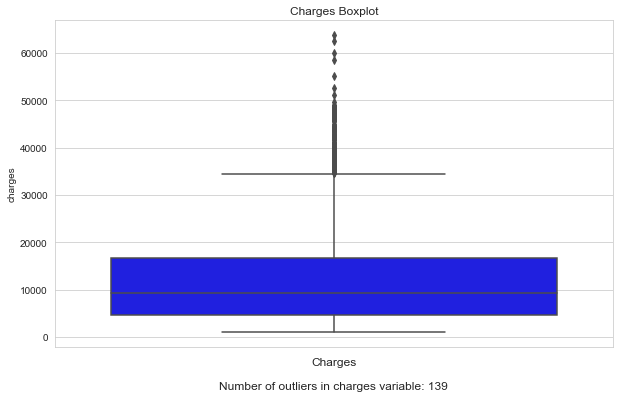

Number of outliers in charges variable:  139


In [4]:
#count outliers in charges variable
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1
number_of_outliers = df[(df['charges'] < (Q1 - 1.5 * IQR)) | (df['charges'] > (Q3 + 1.5 * IQR))].shape[0]

#plot boxplot for charges variable
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
plt.title('Charges Boxplot')
splot=sns.boxplot(y=df['charges'], color='blue')
stats_text = '\n\nNumber of outliers in charges variable: ' + str(number_of_outliers)
plt.xlabel('Charges' + stats_text, fontsize=12)
plt.show()


print('Number of outliers in charges variable: ', df[(df['charges'] < (Q1 - 1.5 * IQR)) | (df['charges'] > (Q3 + 1.5 * IQR))].shape[0])

The results shows that we have 139 outliers in our data. We can see the outliers in the boxplot above.
Now we want to see the brief descriptions of the outlier data.

```python

In [5]:
outliers_data = df[(df['charges'] < (Q1 - 1.5 * IQR)) | (df['charges'] > (Q3 + 1.5 * IQR))]
outliers_data.describe()

,age,bmi,children,charges
count,139.000000,139.000000,139.000000,139.000000
mean,41.079137,35.564604,1.187050,42103.947206
std,13.801420,4.434917,1.126546,5582.168107
min,18.000000,22.895000,0.000000,34617.840650
25%,30.000000,32.667500,0.000000,37786.149950
50%,43.000000,35.200000,1.000000,40974.164900
75%,52.500000,37.660000,2.000000,45786.706425
max,64.000000,52.580000,4.000000,63770.428010


The minimum value of charges reach 34k and the mean value of charges reach 42k. That's a huge number, but we won't remove the outliers here because we want to see if this value would gain us any insight in our analysis later.

```python

-----------------------------------------

## Research Question

Now we begin to analyze the data with the help of research questions. Research questions help us to define the scope and focus of your study, and provide a framework for collecting and analyzing data. Here is some research questions that we want to answer:

#### 1. What's the characteristic of users based on their age?
#### 2. Does physical condition affect insurance costs?
#### 3. How influential does external factors have towards insurance costs?
#### 4. How significant is the relationship between smoker and costs?

In the following, there is an analysis carried out for each research question. For the full report of the analysis, you can check it at the following link [Statistical Analysis of Healthcare Insurance Costs](https://medium.com/@mhugoathalla/statistical-analysis-of-healthcare-insurance-costs-b0af793bdc44)

------------------------------------------

#### 1. What's the characteristic of users based on their age?

Age Distribution

User's age average: 39.21


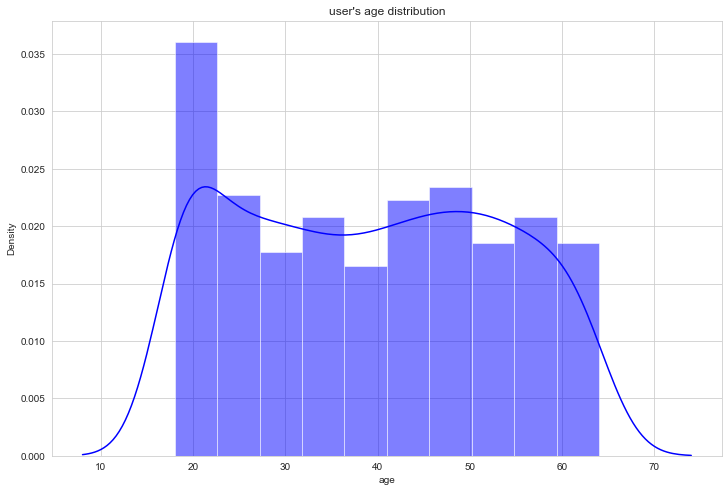

In [6]:
#create a new column for age group
df['age_group'] = pd.cut(df['age'], bins=[17, 22, 27, 32, 37, 42, 47, 52, 57, 62, 67], labels=['17-22', '22-27', '27-32', '32-37', '37-42', '42-47', '47-52', '52-57', '57-62' ,'62-67'])

#user age average
user_age_average = df['age'].mean()

print('User\'s age average: {:.2f}'.format(user_age_average))

#plot user's age distribution
vs.distribution_plot(
        title = 'user\'s age distribution',
        x = df['age'], 
        xlabel = 'age', 
        bins = 10,
        )

Probability of being a smoker per age group

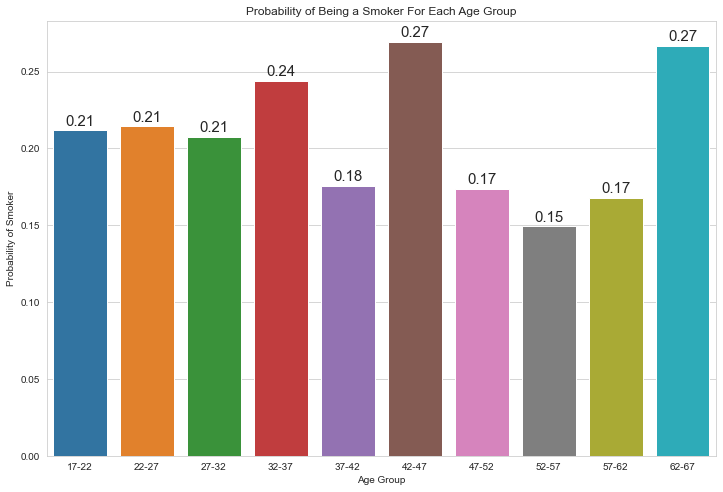

In [248]:
#probability of being smoker for each age group
smoker_probability = df.groupby(['age_group', 'smoker'])['smoker'].count().unstack('smoker').fillna(0)
smoker_probability['total'] = smoker_probability['no'] + smoker_probability['yes']
smoker_probability['no'] = smoker_probability['no'] / smoker_probability['total']
smoker_probability['yes'] = smoker_probability['yes'] / smoker_probability['total']
smoker_probability = smoker_probability.drop('total', axis=1)
smoker_probability = smoker_probability.sort_values(by='yes', ascending=False)

#plot data
#plot data pmf of smoker based on age group
vs.barplot(title='Probability of Being a Smoker For Each Age Group',
           x=smoker_probability.index, 
           y=smoker_probability['yes'], 
           xlabel='Age Group', 
           ylabel='Probability of Smoker')


Probability of having more than 1 children per age group

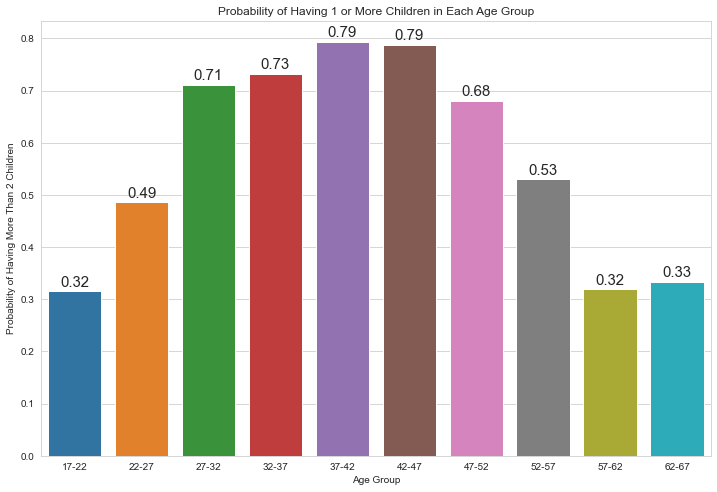

In [246]:
#grouping data by age groups
#df['age_group'] = pd.cut(df['age'], bins=[17, 22, 27, 32, 37, 42, 47, 52, 57, 62, 67], labels=['17-22', '22-27', '27-32', '32-37', '37-42', '42-47', '47-52', '52-57', '57-62' ,'62-67'])

#calculate probabilty of each age group having more than 2 children
age_group_children_prob = df.groupby(['age_group', 'children'])['children'].count().unstack('children').fillna(0)
age_group_children_prob['total'] = age_group_children_prob.sum(axis=1)
age_group_children_prob['1_or_more'] = age_group_children_prob[1] + age_group_children_prob[2] + age_group_children_prob[3] + age_group_children_prob[4] + age_group_children_prob[5]
age_group_children_prob['1_or_more'] = age_group_children_prob['1_or_more'] / age_group_children_prob['total']
age_group_children_prob = age_group_children_prob.drop(['total', 0, 1, 2, 3, 4, 5], axis=1)

#plot data
vs.barplot(title='Probability of Having 1 or More Children in Each Age Group',
              x=age_group_children_prob.index,
                y=age_group_children_prob['1_or_more'],
                xlabel='Age Group',
                ylabel='Probability of Having More Than 2 Children')


Average Charges in Each Age Group

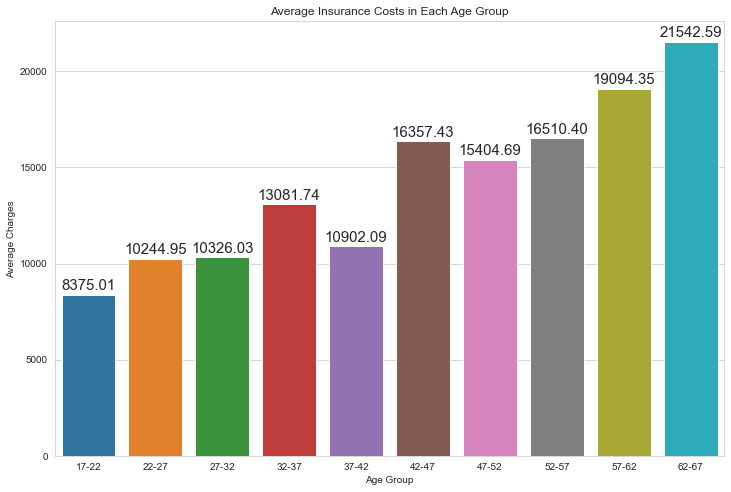

In [11]:
#age group average charges
age_group_charges_avg = df.groupby('age_group')['charges'].mean()

#plot data
vs.barplot(title='Average Insurance Costs in Each Age Group',
           x=age_group_charges_avg.index,
           y=age_group_charges_avg.values,
           xlabel='Age Group',
           ylabel='Average Charges')

Age correlation with other variables

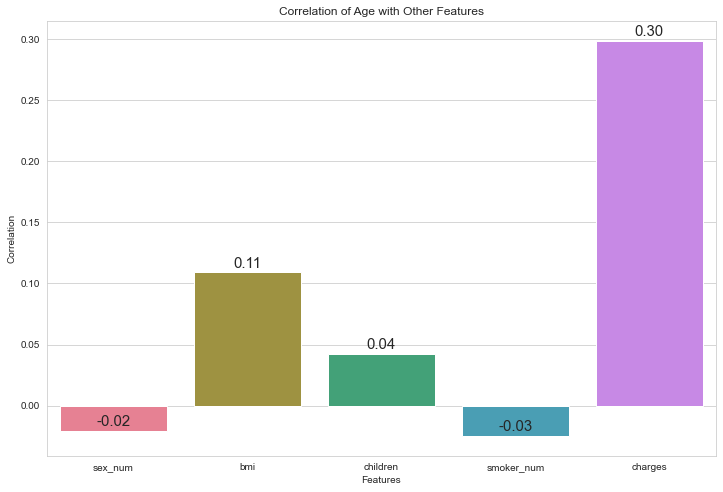

In [9]:
#changing categorical data to numerical data
df['smoker_num'] = df['smoker'].apply(lambda x: 1 if x == 'yes' else 0)
df['sex_num'] = df['sex'].apply(lambda x: 1 if x == 'male' else 0)

#create correlation matrix in dataframe format
correlation_df = df[['age', 'sex_num' ,'bmi', 'children', 'smoker_num', 'charges']].corr()
correlation_df = correlation_df[0:1].drop(['age'], axis=1)

#plot correlation of age with other features
vs.barplot(title='Correlation of Age with Other Features',
           x=correlation_df.columns,
           y=correlation_df.values[0],
           xlabel='Features',
           ylabel='Correlation',
           palette='husl')


The scatter plot between age and charges variable

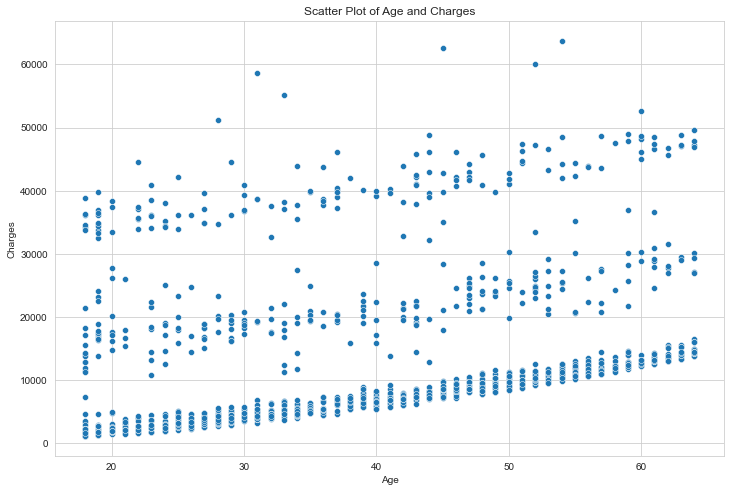

In [402]:
#scatter plot of age and charges
vs.scatterplot(title='Scatter Plot of Age and Charges',
               x=df['age'],
               y=df['charges'],
               xlabel='Age',
               ylabel='Charges')


Takeaways:
- Many young people aged 17–22 years are already aware of having health insurance (which is good).


- Users in the age group 42–47 and 62–67 are the users most likely to be smokers


- Users in the age range of 27–52 have a higher chance to have a child as a dependent


- The higher the age of the users, the more likely that the insurance charges become greater

---------------------------

### 2. Does physical condition affect insurance costs?

Distribution of bmi

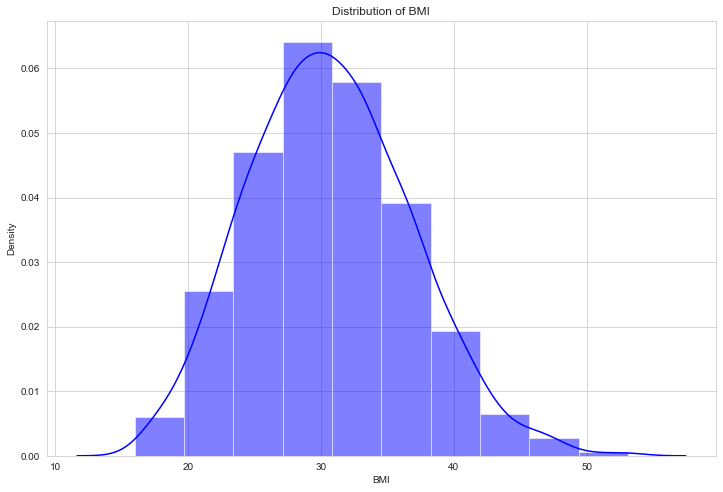

In [123]:
#distribution of bmi
vs.distribution_plot(
        title = 'Distribution of BMI',
        x = df['bmi'],
        xlabel = 'BMI',
        bins = 10,
        )

Men average BMI vs Women average BMI

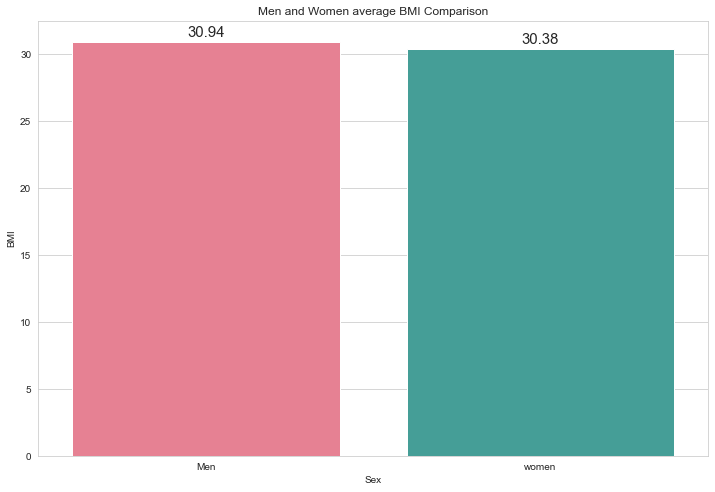

In [16]:
#Men and Women average BMI Comparison

#calculate
men_bmi_avg = df[df['sex']=='male']['bmi'].mean()
women_bmi_avg = df[df['sex']=='female']['bmi'].mean()

data = {
    'BMI' : [men_bmi_avg, women_bmi_avg],
    'sex' : ['Men', 'women']
}

#plot data
vs.barplot(
        title="Men and Women average BMI Comparison",
        x=data['sex'],
        y=data['BMI'],
        xlabel = 'Sex',
        ylabel = 'BMI',
        palette = 'husl'
)


Distribution of men and women BMI

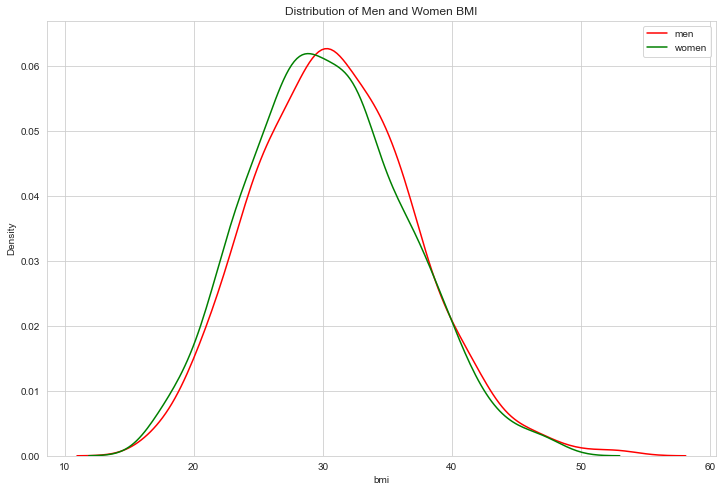

In [339]:
#Distribution of men and women BMI
#plot data
plt.figure(figsize=(12, 8))
plt.title('Distribution of Men and Women BMI')
plt.xlabel('Charges')
sns.distplot(df[df['sex'] == 'male']['bmi'], color='red', bins=10, hist_kws={'alpha': 0.0})
sns.distplot(df[df['sex'] == 'female']['bmi'], color='g', bins=10, hist_kws={'alpha': 0.0})
plt.legend(['men', 'women'])
        


Average insurance charges based on gender

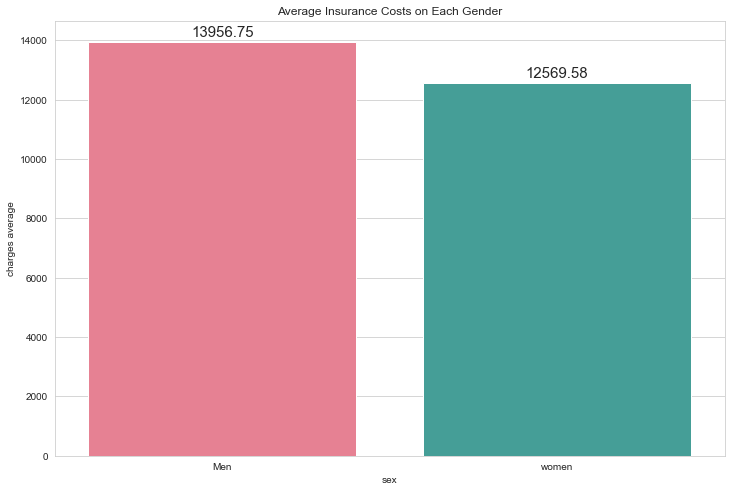

In [370]:
#average insurance charges based on gender

men_age_charges_avg = df[df['sex']=='male']['charges'].mean()
women_age_charges_avg = df[df['sex']=='female']['charges'].mean()

data = {
    'charges_average' : [men_age_charges_avg, women_age_charges_avg],
    'sex' : ['Men', 'women']
}

#plot
vs.barplot(
        title="Average Insurance Costs on Each Gender",
        x=data['sex'],
        y=data['charges_average'],
        xlabel='sex',
        ylabel='charges average',
        palette='husl'
)


distribution of charges_average on each gender

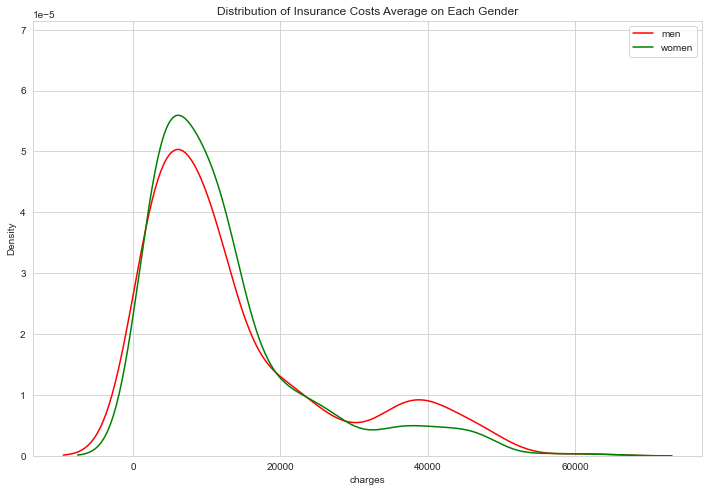

In [355]:
#distribution of charges_average on each gender
#plot data
plt.figure(figsize=(12, 8))
plt.title('Distribution of Insurance Costs Average on Each Gender')
plt.xlabel('Charges')
sns.distplot(df[df['sex'] == 'male']['charges'], color='red', bins=10, hist_kws={'alpha': 0.0})
sns.distplot(df[df['sex'] == 'female']['charges'], color='g', bins=10, hist_kws={'alpha': 0.0})
plt.legend(['men', 'women'])

hyopothesis testing 
- H0: Men and Women have the same average insurance charges
- H1: Men have higher average insurance charges than Women\

In [378]:
#hyopothesis testing 
#H0: Men and Women have the same average insurance charges
#H1: Men have higher average insurance charges than Women\


#assign random state
seed(111)


#calculate

#take sample
men_charges_sample = df[(df['sex']=='male')]['charges'].sample(100)
women_charges_sample = df[(df['sex']=='female')]['charges'].sample(100)

#set alpha
alpha = 0.05

#calculate ztest
z_score, p_val = ztest(x1=men_charges_sample, x2=women_charges_sample, alternative='larger')

print('z_score: ', z_score)
print('p_val: ', p_val)

#conclusion
if p_val < alpha:
    print('\nWe reject the null hypothesis')
else:
    print('\nWe fail to reject the null hypothesis')

 

z_score:  0.8026986234366225
p_val:  0.21107447438953664

We fail to reject the null hypothesis


Insurance charges averages based on BMI

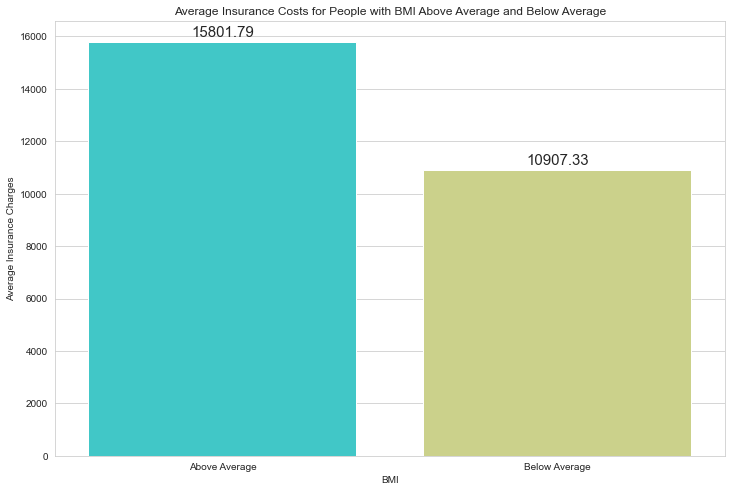

In [395]:
BMI_average = df['bmi'].mean()
bmi_above_average = df[df['bmi'] >= BMI_average]
bmi_below_average = df[df['bmi'] <= BMI_average]

#plot data
vs.barplot(
        title="Average Insurance Costs for People with BMI Above Average and Below Average",
        x=['Above Average', 'Below Average'],
        y=[bmi_above_average['charges'].mean(), bmi_below_average['charges'].mean()],
        xlabel = 'BMI',
        ylabel = 'Average Insurance Charges',
        palette = 'rainbow'
)


Calculate the probability of having insurance charges above average and below average based on BMI

- the probability of a user's with bmi above average having insurance charges above average
- the probability of a user's with bmi above average having insurance charges below average
- the probability of a user's with bmi below average having insurance charges above average
- the probability of a user's with bmi below average having insurance charges below average


In [394]:
BMI_average = df['bmi'].mean()
charges_average = df['charges'].mean()
print('BMI average: {:.2f}'.format(BMI_average))
print('Charges average: {:.2f}'.format(charges_average))


#calculate the probability of a user's with bmi above average having insurance charges above average
bmi_above_average = df[df['bmi'] > BMI_average]
bmi_above_average_charges_above_average = bmi_above_average[bmi_above_average['charges'] > df['charges'].mean()]
bmi_above_average_charges_above_average_probability = bmi_above_average_charges_above_average.shape[0] / bmi_above_average.shape[0]

#calculate the probability of a user's with bmi above average having insurance charges below average
bmi_above_average_charges_below_average = bmi_above_average[bmi_above_average['charges'] < df['charges'].mean()]
bmi_above_average_charges_below_average_probability = bmi_above_average_charges_below_average.shape[0] / bmi_above_average.shape[0]

#calculate the probability of a user's with bmi below average having insurance charges below average
bmi_below_average = df[df['bmi'] < BMI_average]
bmi_below_average_charges_below_average = bmi_below_average[bmi_below_average['charges'] < charges_average]
bmi_below_average_charges_below_average_probability = bmi_below_average_charges_below_average.shape[0] / bmi_below_average.shape[0]

#calculate the probability of a user's with bmi below average having insurance charges above average
bmi_below_average_charges_above_average = bmi_below_average[bmi_below_average['charges'] > charges_average]
bmi_below_average_charges_above_average_probability = bmi_below_average_charges_above_average.shape[0] / bmi_below_average.shape[0]


print('BMI average: {:.2f}'.format(BMI_average))
print('Charges average: {:.2f}'.format(charges_average))
print()
print('Probability of a user\'s with bmi above average having insurance charges above average: {:.2f}'.format(bmi_above_average_charges_above_average_probability))
print('Probability of a user\'s with bmi above average having insurance charges below average: {:.2f}'.format(bmi_above_average_charges_below_average_probability))
print()
print('Probability of a user\'s with bmi below average having insurance charges above average: {:.2f}'.format(bmi_below_average_charges_above_average_probability))
print('Probability of a user\'s with bmi below average having insurance charges below average: {:.2f}'.format(bmi_below_average_charges_below_average_probability))


BMI average: 30.66
Charges average: 13270.42

Probability of a user's with bmi above average having insurance charges above average: 0.34
Probability of a user's with bmi above average having insurance charges below average: 0.66

Probability of a user's with bmi below average having insurance charges above average: 0.29
Probability of a user's with bmi below average having insurance charges below average: 0.71


Correlation between BMI and Insurance Charges

In [178]:
#Correlation between BMI and Insurance Charges

#calculate correlation
bmi_charges_correlation = df['bmi'].corr(df['charges'])
print('Correlation between BMI and Insurance Charges: {:.2f}'.format(bmi_charges_correlation))

Correlation between BMI and Insurance Charges: 0.20


Draw a scatter plot to see the relationship between BMI and Insurance Charges

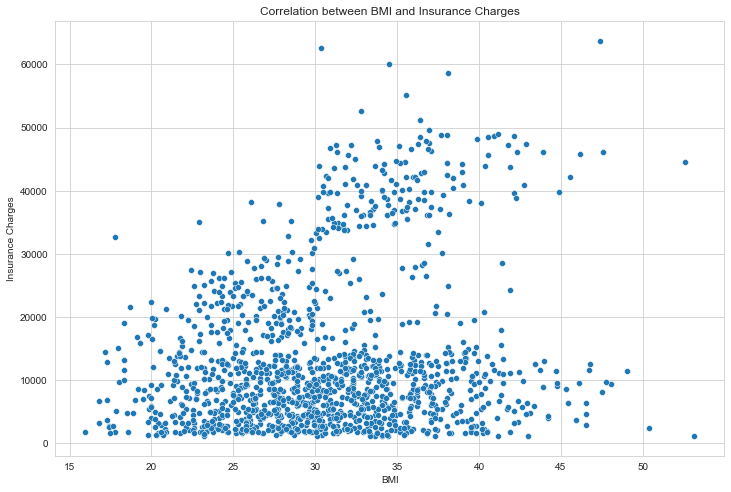

In [401]:
#scatter plot between BMI and Insurance Charges
vs.scatterplot(
    title='Correlation between BMI and Insurance Charges',
    x=df['bmi'],
    y=df['charges'],
    xlabel='BMI',
    ylabel='Insurance Charges',
)

Hypothesis Testing
- H0: User's with higher bmi having the same amount of insurance charges as user's with lower bmi
- H1: User's with higher bmi having higher amount of insurance charges compared to user's with lower bmi 

In [377]:
#hypothesis testing
#h0: User's with higher bmi having the same amount of insurance charges as user's with lower bmi
#h1: User's with higher bmi having higher amount of insurance charges compared to user's with lower bmi 

seed(111)

#take samples
bmi_above_average_sample = bmi_above_average['charges'].sample(100)
bmi_below_average_sample = bmi_below_average['charges'].sample(100)

#set alpha
alpha = 0.05

#calculate z-statistic and p-value
z_statistic, p_value = ztest(x1=bmi_above_average_sample, x2=bmi_below_average_sample, alternative='larger')

print('The p-value is: ', p_value)

if p_value < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

The p-value is:  0.00011328443523333664
We reject the null hypothesis


Takeaways:
- Gender does not have a significant effect on insurance costs.


- The higher the BMI, the more likely the insurance costs will be high, and vice versa.

---------------------

### 3. How influential does external factors have towards insurance charges?

Distribution of Insurance Charges by Region

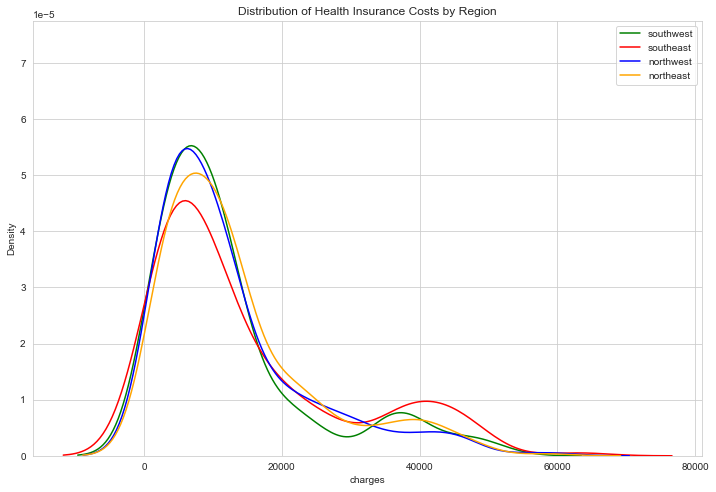

In [291]:
#plot charges distribution by region
plt.figure(figsize=(12, 8))
plt.title('Distribution of Health Insurance Costs by Region')
plt.xlabel('Charges')
sns.distplot(df[df['region'] == 'southwest']['charges'], color='g', bins=10, hist_kws={'alpha': 0.0})
sns.distplot(df[df['region'] == 'southeast']['charges'], color='r', bins=10, hist_kws={'alpha': 0.0})
sns.distplot(df[df['region'] == 'northwest']['charges'], color='b', bins=10, hist_kws={'alpha': 0.0})
sns.distplot(df[df['region'] == 'northeast']['charges'], color='orange', bins=10, hist_kws={'alpha': 0.0})
plt.legend(['southwest', 'southeast', 'northwest', 'northeast'])

Insurance cost average per region

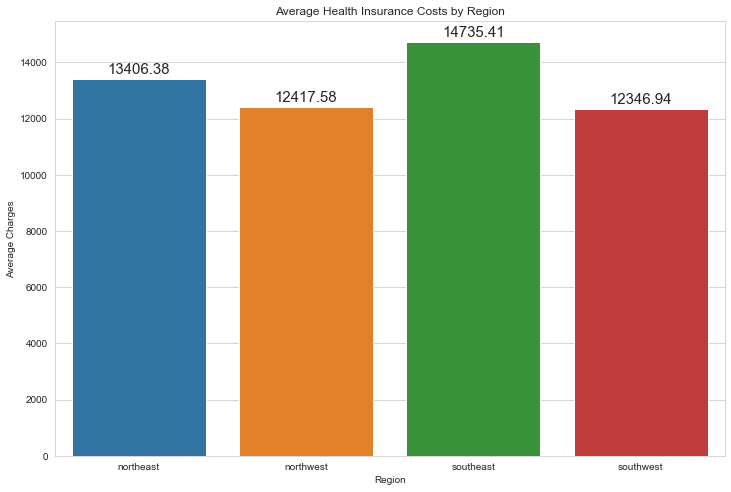

In [290]:
#plot charges average by region

vs.barplot(title='Average Health Insurance Costs by Region',
           x=df.groupby('region')['charges'].mean().index,
           y=df.groupby('region')['charges'].mean().values,
           xlabel='Region',
           ylabel='Average Charges')



Hypothesis testing 
- H0: User's from southeast region having the same amount of insurance charges as user's from northwest region
- H1: User's from southeast region having higher amount of insurance charges compared to user's from northwest region

In [383]:
#hypothesis testing

#hypothesis testing for smokers and non-smokers using z-test
#null hypothesis: User's from southeast region having the same amount of insurance charges as user's from northeast region
#alternative hypothesis: User's from southeast region having higher amount of insurance charges compared to user's from northeast region

#assign random seed
seed(111)

#take samples
southeast_sample = df[df['region'] == 'southeast']['charges'].sample(100)
northwest_sample = df[df['region'] == 'northwest']['charges'].sample(100)

#set alpha
alpha = 0.05

#calculate z-score
z_score, p_value = ztest(southeast_sample, northwest_sample, alternative='larger')

print('The p-value is: ', p_value)

if p_value < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

The p-value is:  0.5876556110289384
We fail to reject the null hypothesis


Hypothesis testing 
- H0: User's from southeast region having the same amount of insurance charges as user's from other region
- H1: User's from southeast region having higher amount of insurance charges compared to user's from other region

In [380]:
#hypothesis testing

#hypothesis testing for smokers and non-smokers using z-test
#null hypothesis: User's from southeast region having the same amount of insurance charges as user's from other region
#alternative hypothesis: User's from southeast region having higher amount of insurance charges compared to user's from other region

#assign random seed
seed(111)

#take samples
southeast_sample = df[df['region'] == 'southeast']['charges'].sample(100)
other_region_sample = df[df['region'] != 'southeast']['charges'].sample(100)

#set alpha
alpha = 0.05

#calculate z-score
z_score, p_value = ztest(southeast_sample, other_region_sample, alternative='larger')

print('The p-value is: ', p_value)

if p_value < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

The p-value is:  0.3770335817123481
We fail to reject the null hypothesis


Number of children and it's variance

In [296]:
#create dataframe of children distribution and its variance
df_children_distribution = df['children'].value_counts().reset_index()
df_children_distribution.columns = ['children', 'number_of_users']
df_children_distribution['variance'] = df.groupby('children')['charges'].var().values

df_children_distribution

,children,number_of_users,variance
0,0,574,1.445596e+08
1,1,324,1.397983e+08
2,2,240,1.661874e+08
3,3,157,1.520503e+08
4,4,25,8.352540e+07
5,5,18,1.450418e+07


Average insurance charges based on number of children

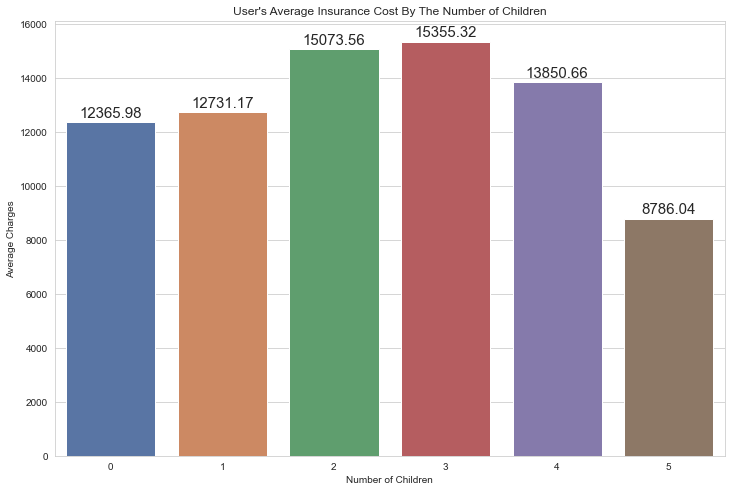

In [325]:
#relationship between amount of children and charges
#average charges for each number of children
children_charges_avg = df.groupby('children')['charges'].mean()

#plot data
vs.barplot(title='User\'s Average Insurance Cost By The Number of Children',
           x=children_charges_avg.index,
           y=children_charges_avg.values,
           xlabel='Number of Children',
           ylabel='Average Charges',
           palette='deep')

distribution of charges for each number of children

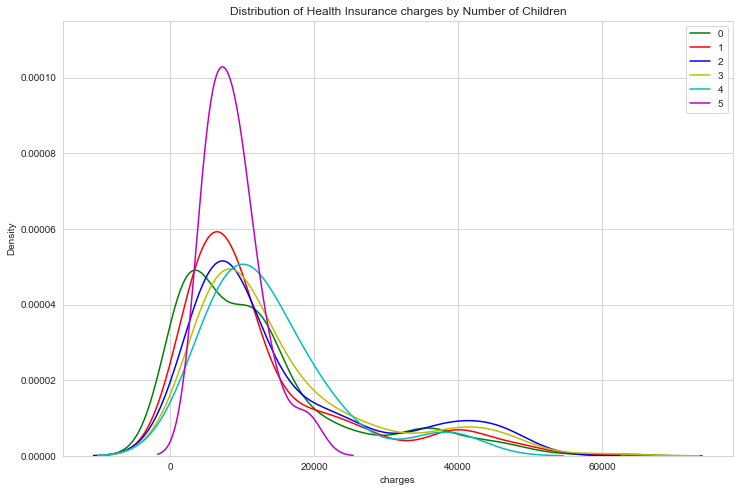

In [227]:
#distribution of charges for each number of children

#plot data
plt.figure(figsize=(12, 8))
plt.title('Distribution of Health Insurance charges by Number of Children')
plt.xlabel('Charges')
sns.distplot(df[df['children'] == 0]['charges'], color='g', bins=10, hist_kws={'alpha': 0.0})
sns.distplot(df[df['children'] == 1]['charges'], color='r', bins=10, hist_kws={'alpha': 0.0})
sns.distplot(df[df['children'] == 2]['charges'], color='b', bins=10, hist_kws={'alpha': 0.0})
sns.distplot(df[df['children'] == 3]['charges'], color='y', bins=10, hist_kws={'alpha': 0.0})
sns.distplot(df[df['children'] == 4]['charges'], color='c', bins=10, hist_kws={'alpha': 0.0})
sns.distplot(df[df['children'] == 5]['charges'], color='m', bins=10, hist_kws={'alpha': 0.0})
#change y axis scale size
plt.ylim(0, 0.000115)
plt.legend(['0', '1', '2', '3', '4', '5'])


Hypothesis testing
- H0: User's with 3 children having the same amount of insurance charges as user's less than 3 children
- H1: User's with 3 children having higher amount of insurance charges compared to user's with less than 3 children


In [387]:
#assign random seed
seed(111)

#take samples

user_with_3kids = df[df['children'] == 3]['charges'].sample(100)
user_with_less_than_3kids = df[df['children'] < 3]['charges'].sample(100)

#set alpha
alpha = 0.05

#calculate z-score
z_score, p_value = ztest(user_with_3kids, user_with_less_than_3kids, alternative='larger')

print('The p-value is: ', p_value)

if p_value < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

The p-value is:  5.796165369040332e-06
We reject the null hypothesis


Correlation between amount of children and insurance charges

In [105]:
#correlation between children and charges

children_charges_corr = df[['children', 'charges']].corr()
children_charges_corr = children_charges_corr[0:1].drop(['children'], axis=1)

print("correlation between amount of children and charges: {}".format(children_charges_corr.values[0][0]))

correlation between amaount of children and charges: 0.06799822684790495


Correlation between amount of children (3 or fewer) and insurance charges

In [305]:
#correlation between children and charges
user_with_less_than_4kids = df[df['children'] < 4][['children','charges']]
user_with_less_than_4kids_corr = user_with_less_than_4kids.corr()

user_with_less_than_4kids = user_with_less_than_4kids_corr[0:1].drop(['children'], axis=1)
print("correlation between amount of children (less than 4) and charges: {}".format(user_with_less_than_4kids.values[0][0]))

correlation between amount of children (less than 4) and charges: 0.09626194823793276


Takeaways:
- Some regions have higher insurance costs, but that doesn't have an impact on someone's insurance costs, this was proven when we fail to reject the null hypothesis of Users from the southeast region have the same amount of insurance charges as users from other regions.


- The more children user have, the greater the cost of insurance, this is also proven by using hypothesis testing, after removing small amounts of user data with more than 3 children

---------------------

### 4. How significant is the relationship between a smoker and insurance charges?

comparison between smokers charges averages and non-smokers charges averages

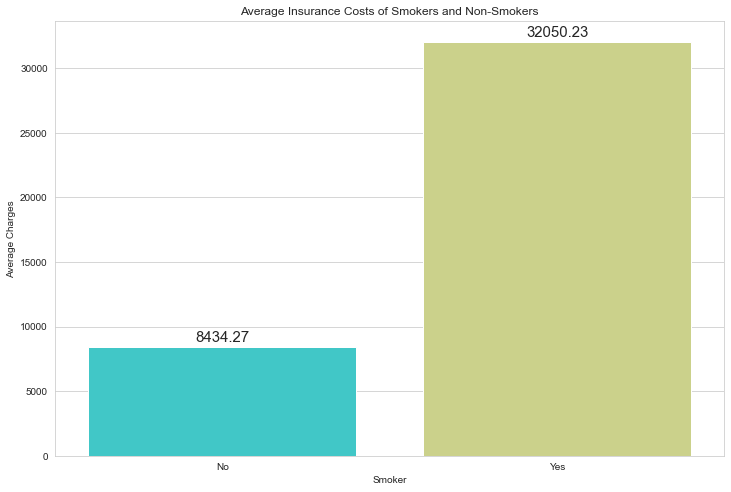

In [326]:
#charges average
smokers_charges_average = df[df['smoker']=='yes']['charges'].mean()
non_smokers_charges_average = df[df['smoker']=='no']['charges'].mean()

data = {
    'smoker': ['No','Yes'],
    'charges': [non_smokers_charges_average, smokers_charges_average]
}

#plot data
vs.barplot(title='Average Insurance Costs of Smokers and Non-Smokers',
           x=data['smoker'],
           y=data['charges'],
           xlabel='Smoker',
           ylabel='Average Charges',
           palette='rainbow')
        

- checking how many smokers in the outlier group
- calculating the probability of being a smoker in the outlier group
- calculating the probability of outlier group being a smoker

In [317]:
#calculate how many smokers belong to outliers group
outliers_smokers = outliers_data[outliers_data['smoker']=='yes']
print('Number of smokers in outliers group: ', outliers_smokers.shape[0])

probability_smoker_outliers = outliers_smokers.count() / df[df['smoker']=='yes'].count()
print('The probability of smoker belongs to the outlier group: {:.2f}'.format(probability_smoker_outliers.values[0]))

#probability of outlier group  being a smoker
probability_outliers_smoker = outliers_smokers.count() / outliers_data.count()
print('The probability of the outlier group belongs being a smoker: {:.2f}'.format(probability_outliers_smoker.values[0]))


Number of smokers in outliers group:  136
The probability of smoker belongs to the outlier group: 0.50
The probability of the outlier group belongs being a smoker: 0.98


Brief description of the smoker outside the outlier group

In [318]:
smoker_df = df[df['smoker']=='yes']
non_outliers_smoker_df = smoker_df[~smoker_df['charges'].isin(outliers_data['charges'])]
non_outliers_smoker_df['charges'].describe()

count      138.000000
mean     22014.245543
std       5517.072699
min      12829.455100
25%      17913.921787
50%      20878.860675
75%      24819.232350
max      34472.841000
Name: charges, dtype: float64

comparison smoker charges average (outside outlier group) with non-smoker charges average

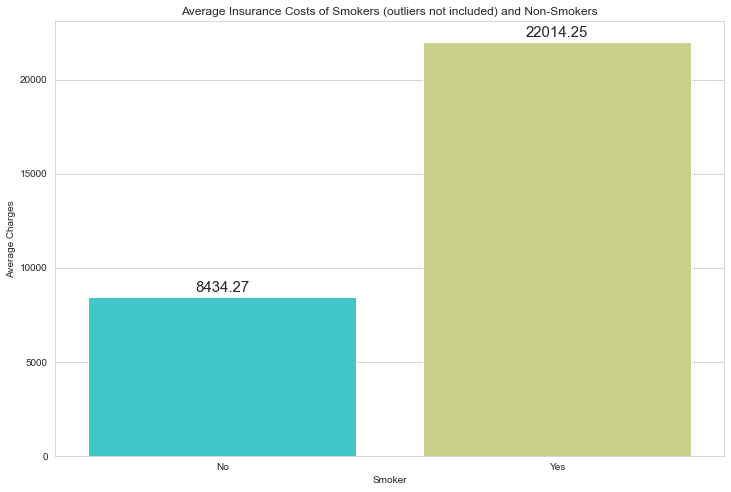

In [328]:
#charges average
smokers_charges_average_non_outliers = non_outliers_smoker_df['charges'].mean()
non_smokers_charges_average = df[df['smoker']=='no']['charges'].mean()

data = {
    'smoker': ['No','Yes'],
    'charges': [non_smokers_charges_average, smokers_charges_average_non_outliers]
}

#plot data
vs.barplot(title='Average Insurance Costs of Smokers (outliers not included) and Non-Smokers',
           x=data['smoker'],
           y=data['charges'],
           xlabel='Smoker',
           ylabel='Average Charges',
           palette='rainbow')
        

smokers correlation with insurance charges

In [335]:
#smokers correlation with children, region, and charges
smokers_correlation_df = df[['smoker_num','charges']].corr()
smokers_correlation_df = smokers_correlation_df[0:1].drop(['smoker_num'], axis=1)

print('The correlation between smokers and charges is: ', smokers_correlation_df.values[0][0])

The correlation between smokers and charges is:  0.7872514304984763


Hypothesis Testing

- H0: Smokers and non-smokers have the same insurance charges
- H1: Smokers have higher insurance charges

In [384]:
#hypothesis testing

#hypothesis testing for smokers and non-smokers using z-test
#null hypothesis: smokers and non-smokers have the same insurance charges
#alternative hypothesis: smokers have higher insurance charges

#assign random seed
seed(111)

#take samples
smoker_charges_sample = df[df['smoker']=='yes']['charges'].sample(50)
non_smoker_charges_sample = df[df['smoker']=='no']['charges'].sample(50)

#set alpha
alpha = 0.05

#calculate z-score
z_score, p_value = ztest(smoker_charges_sample, non_smoker_charges_sample, alternative='larger')


print('The p-value is: ', p_value)

if p_value < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

The p-value is:  4.0184092628213456e-45
We reject the null hypothesis


Takeaway:
- After carrying out several steps such as descriptive analysis, correlation test, and hypothesis testing, we can conclude that smoking habits greatly affect insurance costs.

## Conclusions

Based on the findings of the analysis, it seems that several factors can affect the cost of health insurance, including age, BMI, the number of children a user has, and smoking habits. In order to reduce insurance costs, individuals may consider taking steps to improve their physical condition and avoid behaviors that can increase their insurance costs, such as smoking. Additionally, buying life insurance at a younger age can be beneficial, it allows you to lock in lower premiums, and can ultimately result in a lower overall cost for life insurance over the course of your lifetime. It may also be beneficial to shop around and compare health insurance policies from different providers to find the most cost-effective option. However, it is important to keep in mind that reducing insurance costs may also involve sacrificing certain features or coverage options, so individuals should carefully evaluate their needs and priorities before making a decision.